# <center>Индивидуальное задание 7</center>
## <center>Задача 1</center>

In [ ]:
import numpy as np
import pandas as pd
import io
import matplotlib.pyplot as plt

# устанавливаем точность чисел с плавающей точкой
%precision %.2f

'%.2f'

В переменную data записаны результаты наблюдений длительности нахождения человека в очереди в зависимости от количества людей в этой очереди

In [ ]:
data = """id,X,Y,Class
1	28	10	1
2	49	49	1
3	48	35	0
4	36	33	1
5	45	54	0"""

In [ ]:
data = pd.read_csv(io.StringIO(data), index_col='id')
data

,X,Y
id,,
1,14,36
2,21,49
3,25,72
4,8,24
5,20,56
6,18,48
7,17,51
8,3,10
9,1,3


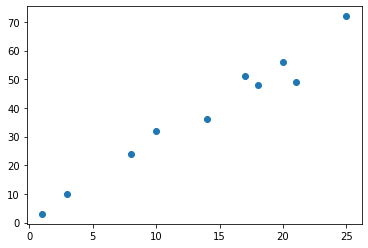

In [ ]:
plt.scatter(data.X, data.Y);

Уравнение регрессии $y = \theta_0 + \theta_1X$, значит модель должна подобрать $\theta_0$ и $\theta_1$.

Какая прямая наилучшая – зависит от того, как мы будем считать ошибки предсказаний.

Будем использовать функцию ошибок MAE - среднеквадратичное отклонения от истинных предсказаний.

In [ ]:
#подключаем модель линейной регрессии из библиотеки sklearn
from sklearn.linear_model import LinearRegression

In [ ]:
# будем обучатся на всех данных
X_train = pd.DataFrame(data.X) # нецелевой признак
mean_x = X_train.mean()
mean_x

X    13.7
dtype: float64

In [ ]:
y_train = pd.DataFrame(data.Y) # целевой признак, который будем предсказывать
mean_y = y_train.mean()
mean_y

Y    38.1
dtype: float64

In [ ]:
#обучаем модель линейной регрессии
reg_model = LinearRegression().fit(X_train, y_train)

Найдем коэффициент свободный член theta_0 и theta_1.

In [ ]:
# theta_0
np.round(reg_model.intercept_, 2)

array([1.96])

In [ ]:
# theta_1
np.round(reg_model.coef_, 2)

array([[2.64]])

Построим выбранную наилучшую прямую, а также отметим точки - объекты нашей выборки.

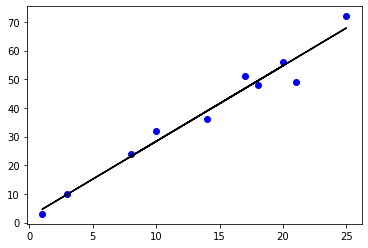

In [ ]:
plt.scatter(data.X, data.Y, color="blue")
plt.plot(data.X, reg_model.predict(X_train), color="black")

plt.show()

Для оценки качества модели, посчитаем как мало ошибаемся и вычислим метрику $R^2$. В данном случае посчитаем просто на тренировочных данных.

In [ ]:
y_predicted = reg_model.predict(X_train)
y_predicted

array([[38.89145254],
       [57.35867855],
       [67.91137913],
       [23.06240168],
       [54.72050341],
       [49.44415312],
       [46.80597798],
       [ 9.87152596],
       [ 4.59517567],
       [28.33875197]])

In [ ]:
from sklearn.metrics import r2_score
np.round(r2_score(y_train, y_predicted), 2)

0.97

Хорошее качество модели, так как $R^2$ близко к 1.